# TASK 1:IRIS FLOWER CLASSIFICATION

## Required Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Read Dataset

In [ ]:
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,se
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Checking Shape

In [ ]:
df.shape

(150, 5)

## Checking Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].unique()

array(['se', 'setosa', 'versicolor', 'virginica'], dtype=object)

<Figure size 1500x1000 with 0 Axes>

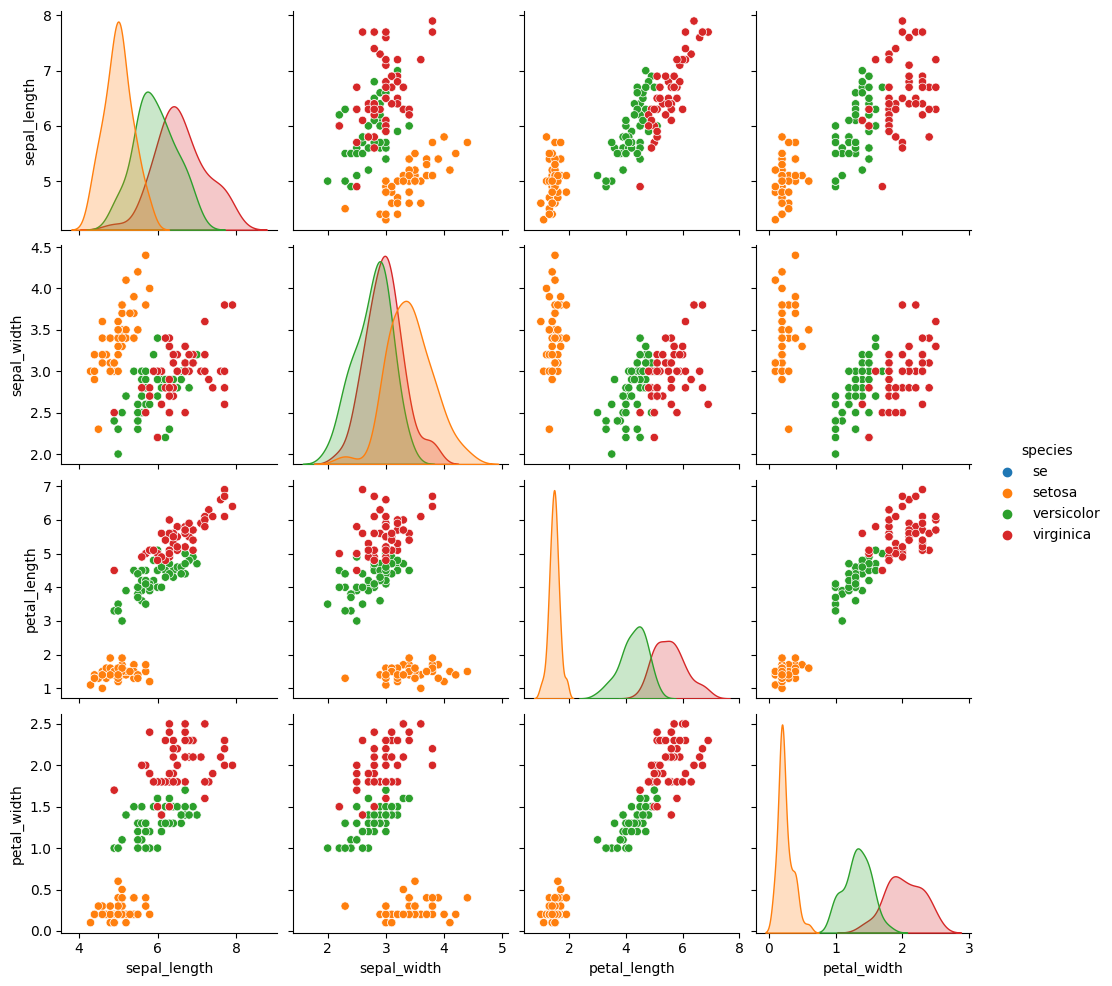

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue='species')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

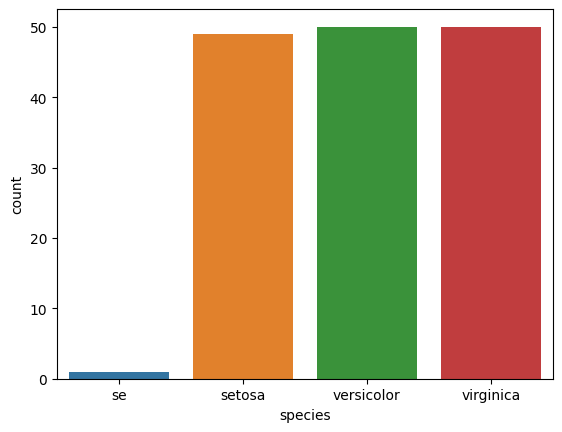

In [ ]:
sns.countplot(x="species",data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

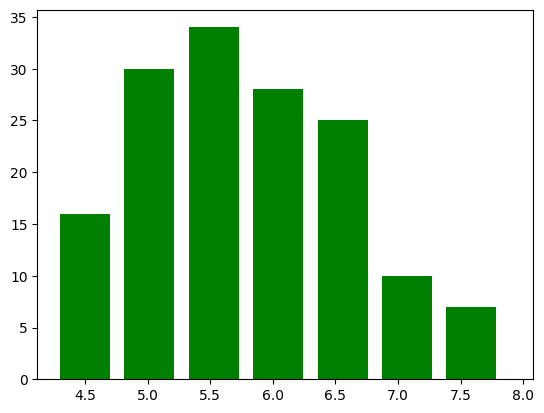

In [ ]:
plt.hist(x=df["sepal_length"],bins=7,width=0.4,color='g')
plt.show

<Axes: xlabel='petal_length'>

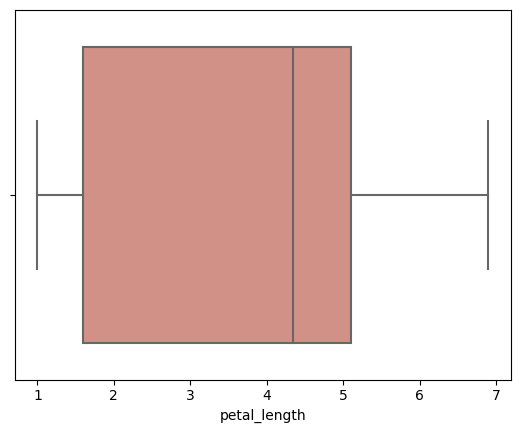

In [ ]:
sns.boxplot(x='petal_length',data=df,color='#df8879')

<Axes: xlabel='sepal_length'>

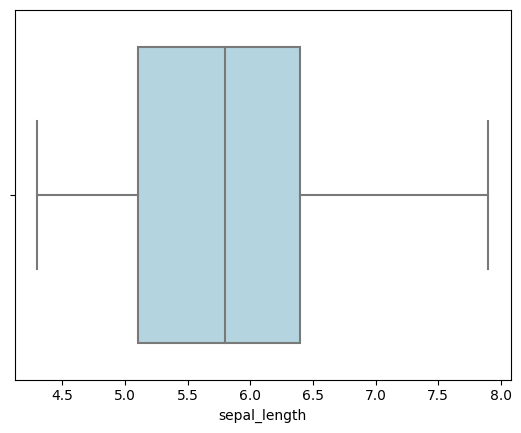

In [ ]:
sns.boxplot(x='sepal_length',data=df,color='lightblue')

<Axes: xlabel='sepal_width'>

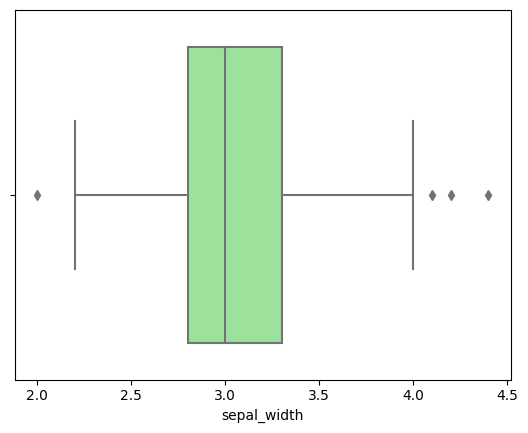

In [ ]:
sns.boxplot(x='sepal_width',data=df,color='lightgreen')

<Axes: xlabel='petal_width'>

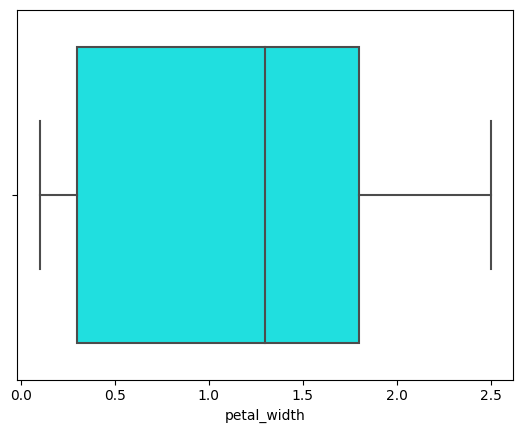

In [ ]:
sns.boxplot(x='petal_width',data=df,color='cyan')

### Removing Outliers from Sepal Width

In [ ]:
Q1=df.sepal_width.quantile(0.25)
Q3=df.sepal_width.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(Q1)
print(Q3)

0.5
2.8
3.3


### Define Outliers Boundaries

In [ ]:
lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

### Identify & Remove Outliers

In [ ]:
df1 = df[(df["sepal_width"] >= lower_bound) & (df["sepal_width"] <= upper_bound)]
print(df1)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2         se
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[146 rows x 5 columns]


<Axes: xlabel='sepal_width'>

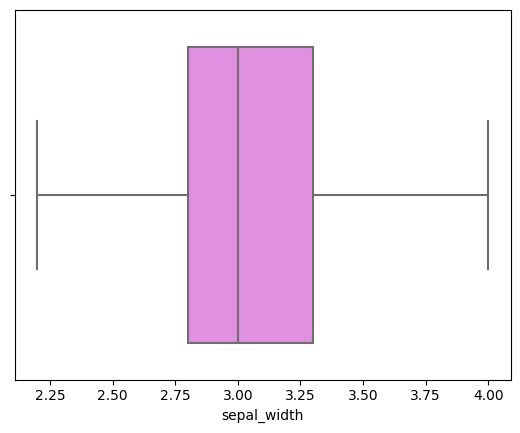

In [ ]:
sns.boxplot(x="sepal_width",data=df1,color='violet')

### Finding Correlation

In [ ]:
df1.corr()

<ipython-input-53-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113977,0.879374,0.822577
sepal_width,-0.113977,1.000000,-0.397123,-0.329782
petal_length,0.879374,-0.397123,1.000000,0.961755
petal_width,0.822577,-0.329782,0.961755,1.000000


In [ ]:
df1.replace({'species': {'se': 1, 'setosa' : 2, 'versicolor': 3, 'virginica' : 4}}, inplace= True)

<ipython-input-54-254bd272955d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'species': {'se': 1, 'setosa' : 2, 'versicolor': 3, 'virginica' : 4}}, inplace= True)


In [ ]:
df1['species'].value_counts()

4    50
3    49
2    46
1     1
Name: species, dtype: int64

### Checking Shape After Removing Outliers

In [ ]:
df1.shape

(146, 5)

## Splitting Data Into Train & Test

In [ ]:
x=df1.drop('species' ,axis=1)
y=df1['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)
y

0      1
1      2
2      2
3      2
4      2
      ..
145    4
146    4
147    4
148    4
149    4
Name: species, Length: 146, dtype: int64

## RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


In [ ]:
print(round(accuracy_score(y_test, y_pred) * 100,2))

90.0


## DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

## Make Prediction on the Test data

In [ ]:
y_pred =dt.predict(x_test)
print(round(accuracy_score(y_test,y_pred) * 100,2))

86.67


## Support Vector Classifier

In [ ]:
s= SVC()
s.fit(x_train, y_train)
y_pred = s.predict(x_test)
print(round(accuracy_score(y_pred,y_test) * 100,2))


90.0


## Random Forest & Support Vector classifier shows the same accuracy which is a good accuracy.